# Solving Van der Pol oscillator with `SciPy`

In [1]:
from scipy.integrate import solve_ivp
import numpy as np

In [2]:
import matplotlib.pyplot as plt

## Van der Pol oscillator:
https://en.wikipedia.org/wiki/Van_der_Pol_oscillator
$$\frac{d^2x}{dt^2}-\mu(1-x^2)\frac{dx}{dt}+x=0$$

## refactoring
The formula of Van der Pol oscillator is a second order differential equation, which is not convenient as the input of the ode solver from `scipy`. We need to refactor it into two first order differntial equations by introducing an auxilliary variable $z$.

$$z = \frac{dx}{dt}$$

$$\frac{dz}{dt} - \mu (1 - x^2) z + x = 0$$

Then we can use this system of two odes as the input of the ode solver. The system is represented by a function that take $[z, x]$ at time $t$ as input and returns an array of $[\frac{dz}{dt}, \frac{dx}{dt}]$, aka $[\frac{dz}{dt}, z]$, which is the differential at time $t$. 

In [3]:
def vdp(t, y, mu):
    z = y[0]
    x = y[1]
    dzdt = mu * (1-x**2) * z - x
    
    return [dzdt, z]

In [8]:
tspan = [0, 10]
y0 = [7, 5]
mu = 0.1
sol = solve_ivp(lambda t,y: vdp(t, y, mu), tspan, y0)

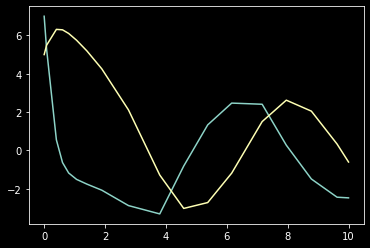

In [9]:
plt.plot(sol.t, sol.y[0,:], sol.t, sol.y[1,:])

In [10]:
sol.y[:,-1]

array([-2.47401738, -0.60380478])

In [11]:
sol.y

array([[ 7.        ,  5.2828547 ,  0.55167623, -0.6315214 , -1.17571077,
        -1.50940203, -1.75660709, -2.07362986, -2.87666226, -3.31131326,
        -0.81264844,  1.33318193,  2.46946253,  2.40905123,  0.27389971,
        -1.48941984, -2.43928733, -2.47401738],
       [ 5.        ,  5.48930674,  6.31527706,  6.29172496,  6.10294528,
         5.7489488 ,  5.19165671,  4.25592015,  2.11427013, -1.28259397,
        -3.02525674, -2.71892153, -1.18335688,  1.50522831,  2.62191714,
         2.05012649,  0.33367086, -0.60380478]])